# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [31]:
pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=9c36d7c76e19e6b0401819b1c36e7d14ceded2c06c4b1415ba6e9b7cd557bc60
  Stored in directory: /Users/JumpMan/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=a39ac84366990945a215da6130aed3c41581605579e0effbd5169cc9d9abb32d
  Stored in directory: /Users/JumpMan/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the kernel to use updated packages.


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA standards continue to de...
1,Not Verified | Awful. Business class check in...
2,✅ Trip Verified | Not a reliable airline. You...
3,✅ Trip Verified | I take comfort in reading t...
4,✅ Trip Verified | The worst journey in my lif...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

__Clean The Data__

In [6]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')

# Load the data
df = pd.read_csv("data/BA_reviews.csv")

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the function to each review
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# View the cleaned data
print(df[['reviews', 'cleaned_reviews']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JumpMan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                             reviews  \
0  ✅ Trip Verified |  BA standards continue to de...   
1  Not Verified |  Awful. Business class check in...   
2  ✅ Trip Verified |  Not a reliable airline. You...   
3  ✅ Trip Verified |  I take comfort in reading t...   
4  ✅ Trip Verified |  The worst journey in my lif...   

                                     cleaned_reviews  
0  trip verified ba standards continue decline ev...  
1  verified awful business class check queue long...  
2  trip verified reliable airline cannot trust ti...  
3  trip verified take comfort reading last ten re...  
4  trip verified worst journey life connection ti...  


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df['cleaned_reviews'] is your column of cleaned text
text_corpus = ' '.join(df['cleaned_reviews'])

# Use CountVectorizer to get word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_corpus])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Save the word frequencies to a CSV file for import into MATLAB
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'frequency'])
word_freq_df.to_csv('data/word_frequencies.csv', index=False)


[nltk_data] Downloading package punkt to /Users/JumpMan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JumpMan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


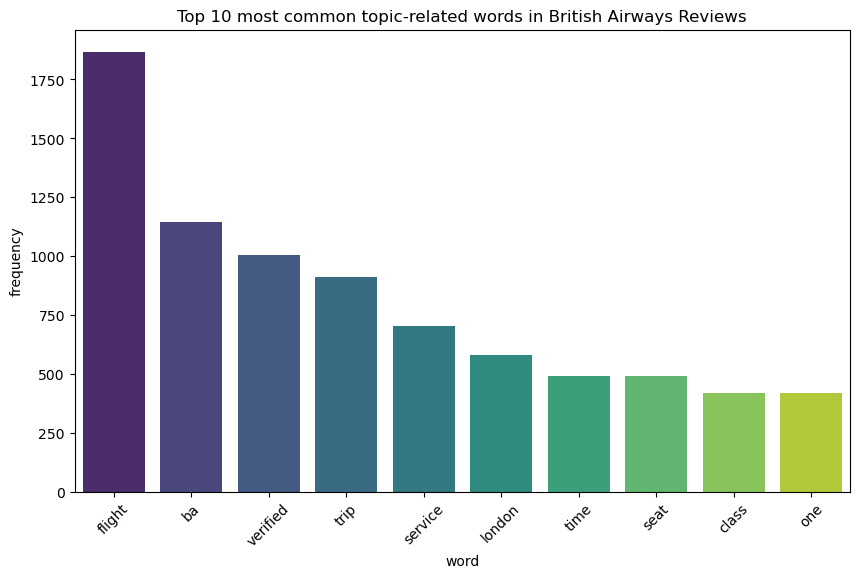

In [34]:
import pandas as pd
from gensim import corpora, models
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the data
df = pd.read_csv("data/BA_reviews.csv")

# Text cleaning
def clean_text(text):
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply text cleaning
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Prepare the text data for LDA
texts = df['cleaned_reviews'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Create a dictionary to hold word frequencies
word_freq = {}
for text in texts:
    for word in text:
        word_freq[word] = word_freq.get(word, 0) + 1

# Convert word frequencies to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'frequency'])

# Extract words strongly associated with topics from the LDA model
topic_words = set()
for topic in lda_model.print_topics(num_words=5):
    words = topic[1].split('"')[1::2]  # Extract words from the topic string
    topic_words.update(words)

# Filter word_freq_df to only include these relevant words
filtered_word_freq_df = word_freq_df[word_freq_df['word'].isin(topic_words)]

# Sort the words by frequency
sorted_filtered_word_freq_df = filtered_word_freq_df.sort_values(by='frequency', ascending=False)

# Get the top 10 most common topic-related words
top_topic_words = sorted_filtered_word_freq_df.head(10)

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='frequency', data=top_topic_words, palette='viridis')
plt.title('Top 10 most common topic-related words in British Airways Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


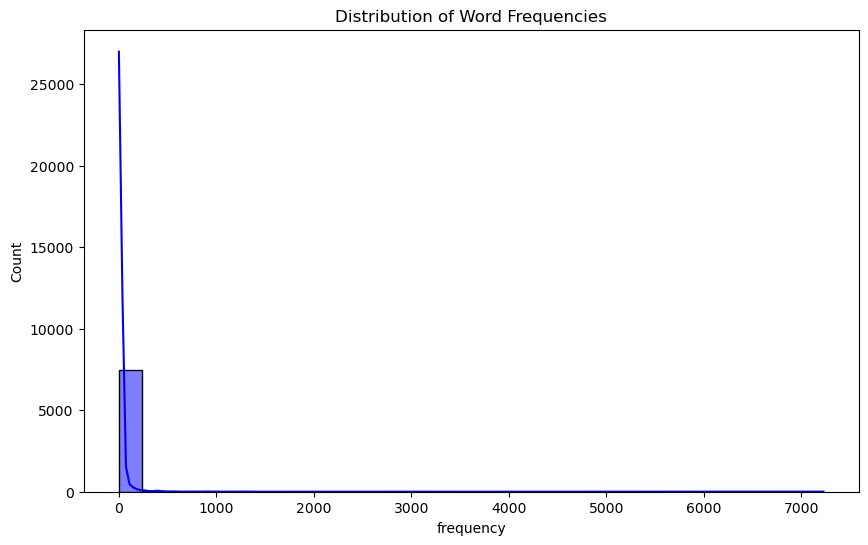

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(word_freq_df['frequency'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Frequencies')
plt.show()


In [20]:
positive_words = ['good', 'great', 'excellent', 'amazing', 'wonderful']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'poor']


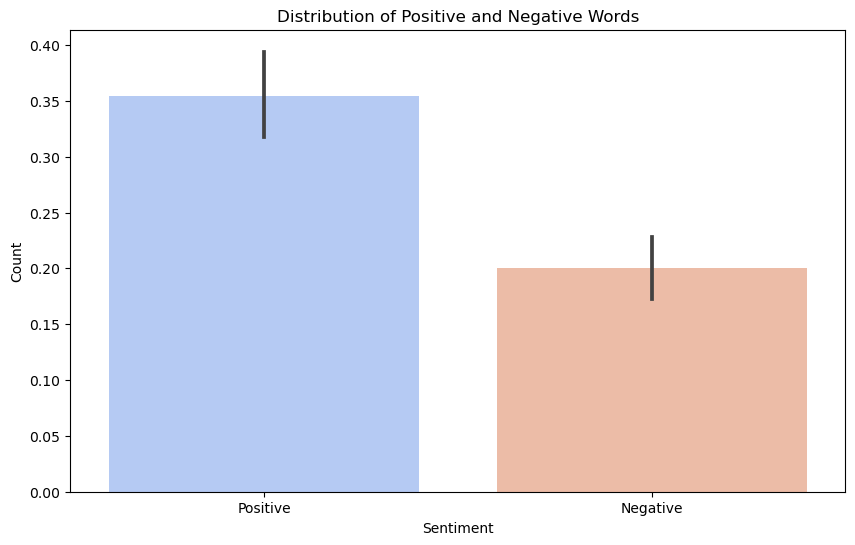

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'cleaned_reviews' is the column with text data
positive_counts = df['cleaned_reviews'].apply(lambda x: sum(word in x.split() for word in positive_words))
negative_counts = df['cleaned_reviews'].apply(lambda x: sum(word in x.split() for word in negative_words))

# Create a new DataFrame for the counts
counts_df = pd.DataFrame({'Positive': positive_counts, 'Negative': negative_counts})

# Melt the DataFrame to have a long-form DataFrame, which works better with Seaborn
melted_counts_df = counts_df.melt(value_name='Count', var_name='Sentiment')

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Sentiment', y='Count', data=melted_counts_df, palette='coolwarm')
plt.title('Distribution of Positive and Negative Words')
plt.show()


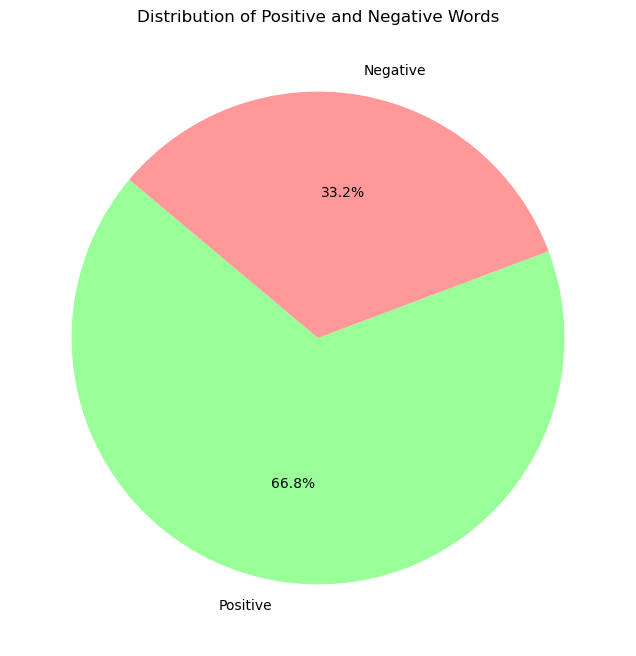

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
df = pd.read_csv('data/BA_reviews.csv')

# Define your lists of words
positive_words = ['good', 'great', 'excellent', 'amazing', 'wonderful']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'poor']

# Initialize counters
positive_count = 0
negative_count = 0

# Function to count the occurrences of positive and negative words
def count_words(text):
    global positive_count
    global negative_count
    words = text.split()
    for word in words:
        word = word.lower()  # Convert to lowercase for consistent matching
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1

# Apply the function to each review
df['reviews'].apply(count_words)

# Now, create a pie chart
counts = [positive_count, negative_count]
labels = ['Positive', 'Negative']
colors = ['#99ff99', '#ff9999']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Positive and Negative Words')
plt.show()
